# Generating data in RL4CO

RL4CO allows for easily generating data from different distributions for CO problems

<a href="https://colab.research.google.com/github/ai4co/rl4co/blob/main/examples/other/3-data-generator-distributions.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>


## Generating different distributions for TSP

/home/botu/anaconda3/envs/rl4co/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 0.98, 'TSP with 100 locations, uniform distribution')

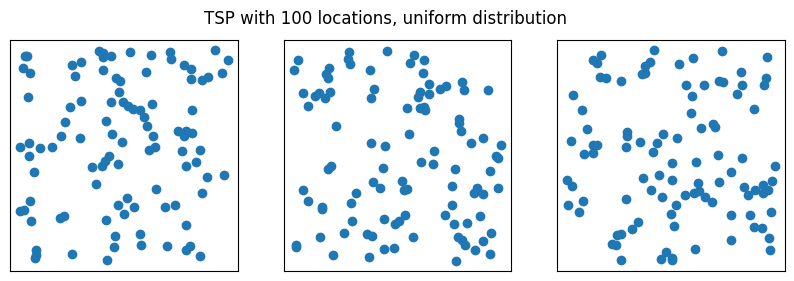

In [1]:
import matplotlib.pyplot as plt
from rl4co.envs.routing import TSPEnv, TSPGenerator
from rl4co.envs.common.distribution_utils import Cluster, Mix_Distribution, Mix_Multi_Distributions, Gaussian_Mixture, Mixed

# Instantiate the environment and generator
generator = TSPGenerator(num_loc=100)
env = TSPEnv(generator=generator)

# Simple plot
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
td = env.generator(3) # generate 3 instances
for i in range(3):
    axs[i].scatter(td["locs"][i][:, 0], td["locs"][i][:, 1])
    axs[i].set_xticks([]); axs[i].set_yticks([])
fig.suptitle("TSP with 100 locations, uniform distribution")

Generating data with different sizes

Text(0.5, 0.98, 'TSP with 1000 locations, uniform distribution')

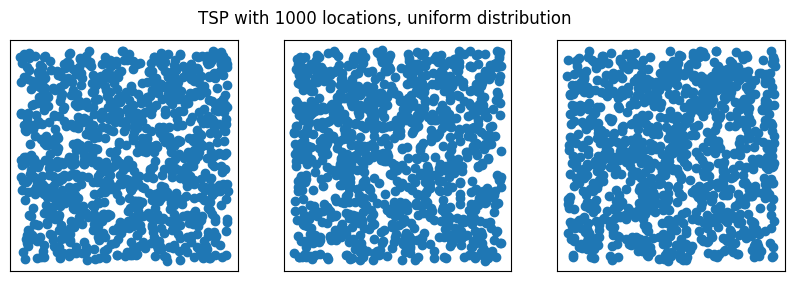

In [2]:
generator = TSPGenerator(num_loc=1000)
env.generator = generator

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
td = env.generator(3) # generate 3 instances
for i in range(3):
    axs[i].scatter(td["locs"][i][:, 0], td["locs"][i][:, 1])
    axs[i].set_xticks([]); axs[i].set_yticks([])
fig.suptitle("TSP with 1000 locations, uniform distribution")

Changing distribution of the data to normal distribution. We can pass the arguments to it by using `loc_` + distribution name as well as its keyword arguments, including here the `mean` and `std` of the normal distribution

Text(0.5, 0.98, 'TSP with 100 locations, normal distribution')

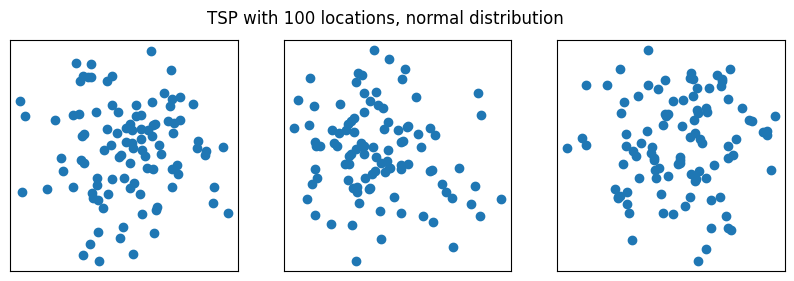

In [3]:
generator = TSPGenerator(num_loc=100, loc_distribution="normal", loc_mean=0, loc_std=1)
env.generator = generator

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
td = env.generator(3) # generate 3 instances
for i in range(3):
    axs[i].scatter(td["locs"][i][:, 0], td["locs"][i][:, 1])
    axs[i].set_xticks([]); axs[i].set_yticks([])
fig.suptitle("TSP with 100 locations, normal distribution")

We can pass a custom `loc_sampler` to the generator (we can make it ourselves!) to generate data from a custom distribution. In this case we use the mixture of three exemplar distributions in batch-level, i.e. Uniform, Cluster, Mixed following the setting in Bi et al. 2022 (https://arxiv.org/abs/2210.07686)

Text(0.5, 0.98, 'TSP with 200 locations, mixed distribution')

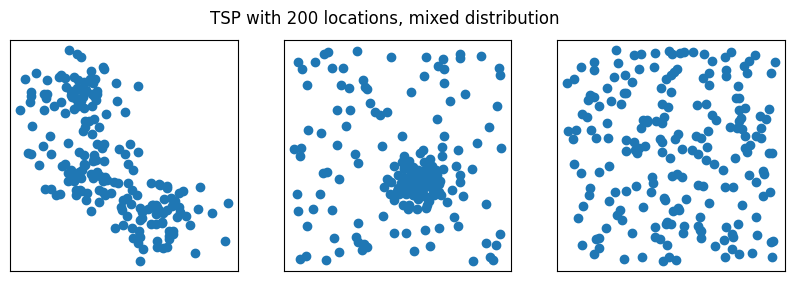

In [4]:
loc_sampler = Mix_Distribution(n_cluster=3)
generator = TSPGenerator(num_loc=200, loc_sampler=loc_sampler)
env.generator = generator

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
td = env.generator(3) # generate 3 instances
for i in range(3):
    axs[i].scatter(td["locs"][i][:, 0], td["locs"][i][:, 1])
    axs[i].set_xticks([]); axs[i].set_yticks([])
fig.suptitle("TSP with 200 locations, mixed distribution")

## Generating different distributions for MCP

In here we visualize the different weight and size distributions for MCP by passing the distribution name, which is automatically parsed:

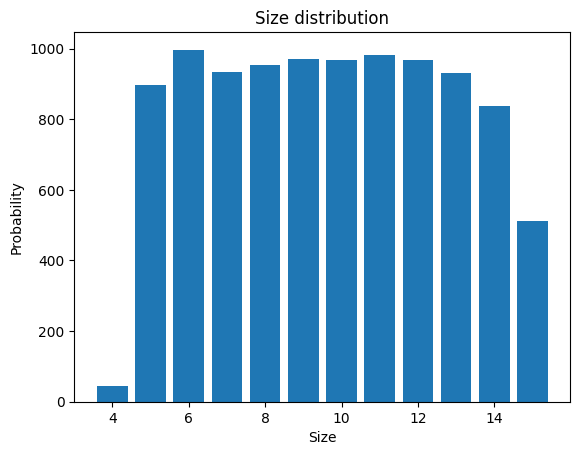

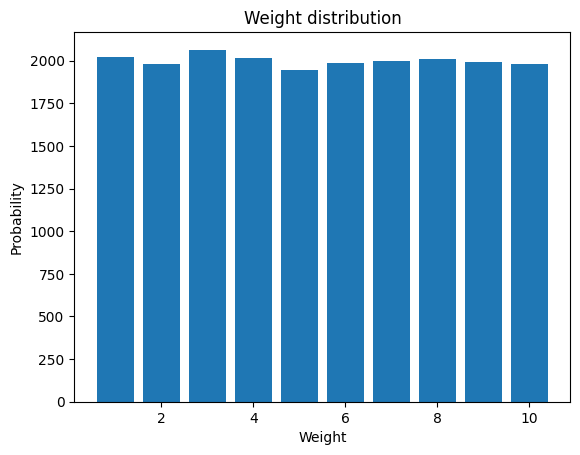

In [5]:
from rl4co.envs.graph import MCPEnv, MCPGenerator
from matplotlib import pyplot as plt
import torch
from collections import Counter

generator = MCPGenerator(size_distribution="uniform", weight_distribution="uniform")
env = MCPEnv(generator=generator)
data = env.generator(100)

sizes = torch.count_nonzero(data["membership"], dim=-1).flatten().tolist()
size2cnt = Counter(sizes)
weights = data["weights"].flatten().tolist()
weight2cnt = Counter(weights)

# plot the size distributions and the weight distributions
plt.figure()
plt.bar(size2cnt.keys(), size2cnt.values())
plt.title("Size distribution")
plt.xlabel("Size")
plt.ylabel("Probability")
plt.show()

# Note: the size distributions are not perfectly uniform since there might be repeated items and are removed in post-processing

plt.figure()
plt.bar(weight2cnt.keys(), weight2cnt.values())
plt.title("Weight distribution")
plt.xlabel("Weight")
plt.ylabel("Probability")
plt.show()



We can also pass a custom `sampler` to generate data:

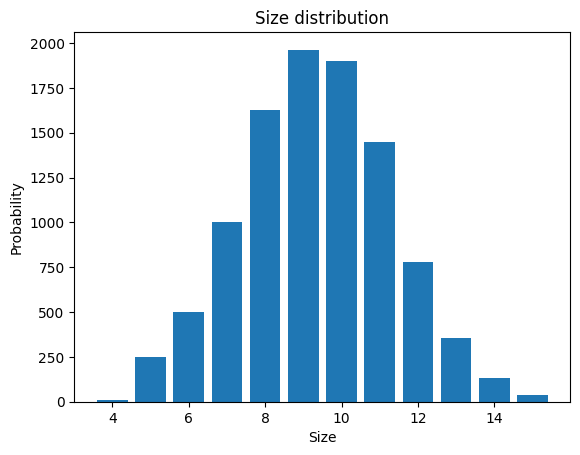

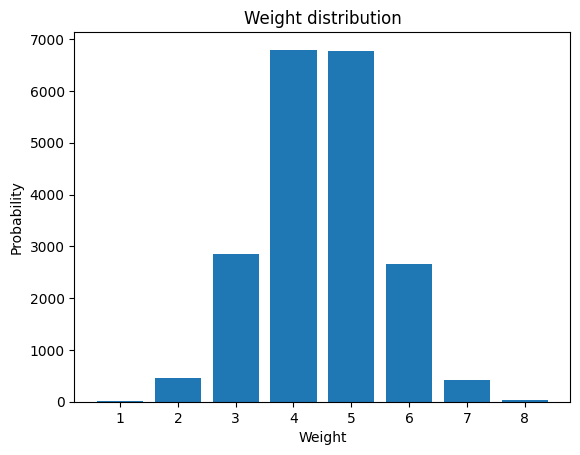

In [6]:
from collections import Counter
from torch.distributions import Normal

size_sampler = Normal(10, 2)
weight_sampler = Normal(5, 1)

generator = MCPGenerator(size_sampler=size_sampler, weight_sampler=weight_sampler)
env = MCPEnv(generator=generator)
data = env.generator(100)

sizes = torch.count_nonzero(data["membership"], dim=-1).flatten().tolist()
size2cnt = Counter(sizes)
weights = data["weights"].flatten().tolist()
weight2cnt = Counter(weights)

# plot the size distributions and the weight distributions
plt.figure()
plt.bar(size2cnt.keys(), size2cnt.values())
plt.title("Size distribution")
plt.xlabel("Size")
plt.ylabel("Probability")
plt.show()

plt.figure()
plt.bar(weight2cnt.keys(), weight2cnt.values())
plt.title("Weight distribution")
plt.xlabel("Weight")
plt.ylabel("Probability")
plt.show()

Tl;dr: RL4CO allows for easily generating data for CO problems! 🚀